# ```Shapely``` Tutorial #

### What is ```Shapely```? ###
```Shapely``` is a Python package for set-theoretic analysis and manipulation of planar features using functions from ```GEOS``` library. ```Shapely``` is thereby deeply rooted in the conventions of the Geographic Information Systems (GIS), but aspires to be equally useful for non-conventional problems.

### Instalation ###
```H3``` can be installed via ```pip3 install shapely```.

### Spatial Data Model ###
The fundamental types of geometric objects implemented are:
- ```Point```: has an ```interior``` set of exactly 1 point, a ```boundary``` set of exactly 0 points, and an ```exterior``` set of all other points (a topological dimension of 0);
- ```Curve```: has an ```interior``` set consisting of infinite points along its length, a ```boundary``` set consisting of its 2 end points, and an ```exterior``` set of all other points (a topological dimension of 1);
- ```Surface```: has an ```interior``` set consisting of infinite points within it, a ```boundary``` set consisting of 1+ ```Curves```, and an ```exterior``` set of all other points, including those within holes that might exist in the ```Surface``` (a topological dimension of 2);

```interior```, ```boundary``` and ```exterior``` sets of a feature are mutually exclusive and their union coincides with the entire plane.

### Geometric Objects ###
- ```Point(x, y)```: takes positional coordinate values (```x```/```y```) or tupled parameters;
    - ```Point.area```: returns the area (always 0);
    - ```Point.length```: returns the length (always 0);
    - ```Point.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
    - ```Point.coords```: returns a tuple with ```x```/```y``` coordinates (those can be accessed via ```Point.x```/```Point.y```);
- ```LineString([tuples])```: represents 1+ connected linear splines between point tuples;
    - ```LineString.area```: returns the area (always 0);
    - ```LineString.length```: returns the length;
    - ```LineString.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
    - ```LineString.coords```: returns a list of tuples (each with ```x```/```y``` coordinates);
- ```LinearRing([tuples])```: represents 2+ connected linear splines that can be explicitly (same first/last vertices) or implicitly (no repetition) closed;
    - ```LinearRing.area```: returns the area (always 0 - despite being closed, it's made only of edges);
    - ```LinearRing.length```: returns the length;
    - ```LinearRing.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
    - ```LinearRing.coords```: returns a list of tuples (each with ```x```/```y``` coordinates);
- ```Polygon(shell=[tuples], holes=[tuples])```: ```shell``` represents 2+ connected linear splines (passed as list of point tuples) and ```holes``` represents 2+ connected splines (also passed as point tuples) that will be cut out from the final polygon - ```holes``` points can only touch the exterior ring once for a valid polygon;
    - ```Polygon.area```: returns the area;
    - ```Polygon.length```: returns the length;
    - ```Polygon.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
    - ```Polygon.exterior/interior.coords```: returns a list of tuples (each with ```x```/```y``` coordinates) for outside/interior edges;

### Collections ###
```Collections``` are immutable collections of geometric objects that can be homogeneous (same type) or heterogeneous and usually result from ```Shapely``` operations.
- ```Points```
    - ```MultiPoint([tuples])```: returns a collection of ```Point```s;
        - ```MultiPoint.area```: returns the area (always 0);
        - ```MultiPoint.length```: returns the length (always 0);
        - ```MultiPoint.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```), considering all ```Point```s;
        - ```list(Point.geoms)```: returns list with all ```Point``` objects;
- ```Lines```
    - ```MultiLineString([lines])```: returns a collection of ```LineString```s;
        - ```MultiLineString.area```: returns the area (always 0);
        - ```MultiLineString.length```: returns the length;
        - ```MultiLineString.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
        - ```list(MultiLineString.geoms)```: returns list with all ```LineString``` objects;

- ```Polygon```
    - ```MultiPolygon([polygons])```: returns a collection of ```Polygon```s (those can't have more than 1 shared points);
        - ```MultiPolygon.bounds```: returns the x-y bounding box (```minx```, ```miny```, ```maxx```, ```maxy```);
        - ```lsit(MultiPolygon.geoms)```: returns list with all ```Polygon``` objects;

### Linear Referencing Methods ###
Useful to specify position along linear features such as ```LineStrings```/```MultiLineStrings``` with a 1-dimensional referencing system.
- ```object.interpolate(distance, normalized=False)```: "walks" along ```object``` and returns the coordinates of the point at ```distance``` (```normalized``` interprets distance as a percentage of ```object```'s length);
- ```object.project(other, normalized=False)```: returns ```object```'s distance to ```other``` (```normalized``` interprets distance as a percentage of ```object```'s length);

### Unary Predicates ###
Implemented as read-only property attributes.
- ```object.is_ccw```: returns ```True``` if ```object```'s coordinates are in counter-clockwise order (applies to ```LinearRing``` only);
- ```object.is_simple```: returns ```True``` if ```object``` does not cross itself;
- ```object.is_ring```: returns ```True``` if ```object``` is a closed and simple ```LineString```

### Binary Predicates ###
Evaluate topological, set-theoretic relationships, and return ```True```/```False```. Both ```object```/```other``` must be geometric objects.
- ```object.__eq__(other)```: returns ```True``` if both ```object```/```other``` are of same type and coordinates match;
- ```object.equals(other)```: returns ```True``` if ```object```'s ```boundary```/```interior```/```exterior``` match ```other```'s;
- ```object.contains(other)```: return ```True``` if no points of ```other``` lie in the exterior of ```object```'s (and at least one point of ```other```'s ```interior``` lies in ```object```'s ```interior```);
- ```object.covers(other)```: returns ```True``` if every point of ```other``` is in ```object```'s ```interior```/```boundary```;
- ```object.crosses(other)```: returns ```True``` if ```object```'s ```interior``` intersects ```other```'s ```interior``` but doesnt contain it;
- ```object.intersects(other)```: returns ```True``` if ```object```'s ```interior``` and ```boundary``` intersect ```other```'s;
- ```object.overlaps(other)```: returns ```True``` if geometries have 1+ (but not all) point in common and their ```interior```s intersection has same dimension as geometries;
- ```object.touches(other)```: returns ```True``` if geometries have at least 1 point in common and their ```interior```s dont intersect;

### Set-Theoretic Methods ###
These methods will always return a geometric object.
- ```object.boundary```: returns ```object```'s ```boundary``` (a polygon's is a line, a line's is a collection of points, a point's is an empty collection);
- ```object.centroid```: returns ```object```'s geometric centroid;
- ```object.difference(other)```: returns a representation of points of ```object``` that are not in ```other```;
- ```object.intersection(other)```: returns a representation of ```object``` and ```other``` intersection points;

### Constructive Methods ###
Yields new objects not derived from set-theoretic analysis.
- ```object.buffer(distance, quad_segs=16, cap_style=1, join_style=1)```: returns an approx representation of points within a given ```distance``` of ```object``` (like a *confidence interval*);
    - ```distance```: defines dialation (if positive) and erosion (if negative);
    - ```quad_segs```: determines number of segments used to approximate a quarter circle around a point;
    - ```cap_style```: 1) ```round```; 2) ```flat```; 3) ```square```;
    - ```join_style```: 1) ```round```; 2) ```mitre```; 3) ```bevel```;
- ```object.convex_hull```: returns representation of smallest convex ```Polygon``` containing all points in ```object``` (unless number of points in ```object``` is less than 3);
- ```object.envelope```: returns representation of point/smallest rectangular polygon (with sides parallel to coordinate axes) that contains ```object```;
- ```object.simplify(tolerance, preserve_topology=True)```: returns simplified representation of ```object```;

### Affine Transformations ###
Return transformed geometries (all except ```Collections```) by either directly supplying coefficients to a transformation matrix, or by using a specific transform (```rotate```, ```scale```, etc.).
- ```shapely.affinity.affine_transform(geom, matrix)```: returns a transformed ```geom``` using ```matrix``` (a transformation matrix as a list/tuple of 6 coefficients as: ```[a, b, d, e, xoff, yoff]```);
- ```shapely.affinity.rotate(geom, angle, origin='center', use_radians=False)```: returns a rotated ```geom``` on a 2D plane by ```angle``` (default: degrees; check ```use_radians```) with ```origin``` as ```center``` (of bounding box) / ```centroid``` / coordinates tuple;
- ```shapely.affinity.scale(geom, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')```: returns a scaled ```geom```, scaled by factors along each dimension (```_fact```);
- ```shapely.affinity.translate(geom, xoff=0.0, yoff=0.0, zoff=0.0)```: returns a translated ```geom``` shifted by offsets along each dimension (```_off```);

### Nearest Points ###
- ```shapely.ops.nearest_points(geom1, geom2)```: returns a tuple of nearest points in ```geom1```/```gemo2``` (returned points have same order as geometries);


### Documentation ###
- H3 Documentation - [Link](https://h3geo.org/docs/api/indexing);


---

### Importing Dependencies ###

In [140]:
import yaml

from shapely import Point, LineString, LinearRing, Polygon # Geometries
from shapely import MultiPoint, MultiLineString, MultiPolygon # Collections
from shapely import affinity # Transformations
from shapely.plotting import plot_points, plot_line, plot_polygon, patch_from_polygon # Plots

import matplotlib.pyplot as plt

### User-Defined Functions ###

In [3]:
def new_plot(xmin, xmax, ymin, ymax, width=4, height=3, dpi=80):
    # Figure
    fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (width, height), dpi= dpi)
    # Limits
    ax.set_xlim(xmin= xmin, xmax= xmax)
    ax.set_ylim(ymin= ymin, ymax= ymax)
    # Grid
    ax.grid(which="major", linestyle="-", alpha=0.5)
    return fig, ax

### Main ###

In [4]:
# Reading the YAML config
with open("./shapely.yaml", "r") as _stream:
    yaml_config = yaml.safe_load(_stream)

**Geometric Objects**

Type: Point
Area: 0.0
Length: 0.0
Bounds: (2.0, 1.0, 2.0, 1.0)
Coordinates: (2.0, 1.0) (x: 2.0, y: 1.0)
Distance to Origin: 2.23606797749979


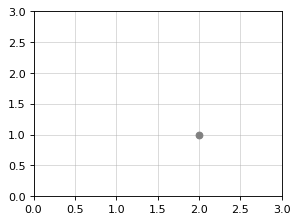

In [58]:
# Creating 'Point'
point = Point(2, 1)
origin = Point(0, 0)
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_points(point, ax= ax, color="gray")
# Properties
print("Type: {}".format(point.geom_type))
print("Area: {}".format(point.area))
print("Length: {}".format(point.length))
print("Bounds: {}".format(point.bounds))
print("Coordinates: {} (x: {}, y: {})".format(list(point.coords)[0], point.x, point.y))
print("Distance to Origin: {}".format(point.distance(origin)))

Type: LineString
Area: 0.0
Length: 3.0
Bounds: (1.0, 1.0, 2.0, 2.0)
Coordinates: [(1.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, 1.0)]


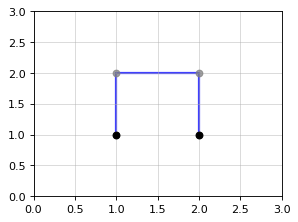

In [25]:
# Creating 'LineStrings'
line = LineString([(1, 1), (1, 2), (2, 2), (2, 1)])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(line, ax= ax, add_points= False, color= "blue", alpha= 0.75) # Line
plot_points(line, ax= ax, color= "gray", alpha= 0.75) # Points
plot_points(line.boundary, ax= ax, color= "black") # Boundary points
# Properties
print("Type: {}".format(line.geom_type))
print("Area: {}".format(line.area))
print("Length: {}".format(line.length))
print("Bounds: {}".format(line.bounds))
print("Coordinates: {}".format(list(line.coords)))

Type: LinearRing
Area: 0.0
Length: 4.0
Bounds: (1.0, 1.0, 2.0, 2.0)
Coordinates: [(1.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, 1.0), (1.0, 1.0)]


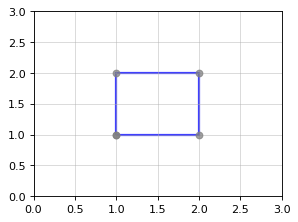

In [26]:
# Creating 'LinearRing'
ring = LinearRing([(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(ring, ax= ax, add_points= False, color= "blue", alpha= 0.75) # Line
plot_points(ring, ax= ax, color= "gray", alpha= 0.75) # Points
# Properties
print("Type: {}".format(ring.geom_type))
print("Area: {}".format(ring.area))
print("Length: {}".format(ring.length))
print("Bounds: {}".format(ring.bounds))
print("Coordinates: {}".format(list(ring.coords)))

Type: Polygon
Area: 3.5
Length: 12.0
Bounds: (0.5, 0.5, 2.5, 2.5)
Centroid: (1.5, 1.5)
Exterior Coordinates: [(0.5, 0.5), (0.5, 2.5), (2.5, 2.5), (2.5, 0.5), (0.5, 0.5)]
Interior Coordinates: [[(1.0, 1.0), (1.5, 1.0), (1.5, 1.5), (1.0, 1.5), (1.0, 1.0)], [(1.5, 1.5), (2.0, 1.5), (2.0, 2.0), (1.5, 2.0), (1.5, 1.5)]]


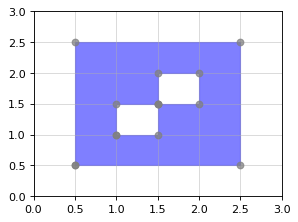

In [71]:
# Creating 'Polygon' (with hole)
ext = [(0.5, 0.5), (0.5, 2.5), (2.5, 2.5), (2.5, 0.5), (0.5, 0.5)]
int1 = [(1, 1), (1.5, 1), (1.5, 1.5), (1, 1.5), (1, 1)] # Must be counter-clockwise
int2 = [(1.5, 1.5), (2, 1.5), (2, 2), (1.5, 2), (1.5, 1.5)] # Must be counter-clockwise
polygon = Polygon(shell= ext, holes= [int1, int2])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_polygon(polygon, ax= ax, add_points= False, color= "blue", alpha= 0.5) # Line
plot_points(polygon, ax= ax, color= "gray", alpha= 0.75) # Points
# Properties
print("Type: {}".format(polygon.geom_type))
print("Area: {}".format(polygon.area))
print("Length: {}".format(polygon.length))
print("Bounds: {}".format(polygon.bounds))
print("Centroid: {}".format(list(polygon.centroid.coords)[0]))
print("Exterior Coordinates: {}".format(list(polygon.exterior.coords))) # LinearRing
print("Interior Coordinates: {}".format([list(each.coords) for each in list(polygon.interiors)])) # Sequence

**Collections**


Type: MultiPoint
Area: 0.0
Length: 0.0
Bounds: (1.0, 1.0, 2.0, 2.0)
Coordinates: [(1.0, 1.0), (1.0, 2.0), (2.0, 1.0), (2.0, 2.0)]


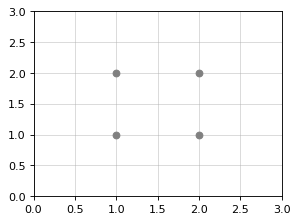

In [90]:
# Creating 'MultiPoint'
multi_point = MultiPoint([(1, 1), (1, 2), (2, 1), (2, 2)])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_points(multi_point, ax= ax, color="gray")
# Properties
print("Type: {}".format(multi_point.geom_type))
print("Area: {}".format(multi_point.area))
print("Length: {}".format(multi_point.length))
print("Bounds: {}".format(multi_point.bounds))
print("Coordinates: {}".format([each.coords[0] for each in list(multi_point.geoms)]))

Type: MultiLineString
Area: 0.0
Length: 5.357388321059432
Bounds: (0.5, 0.5, 2.5, 2.5)
Coordinates: [[(0.5, 0.5), (1.5, 1.5), (2.5, 2.0)], [(1.0, 2.5), (2.0, 2.5), (2.5, 2.0), (2.0, 1.0)]]


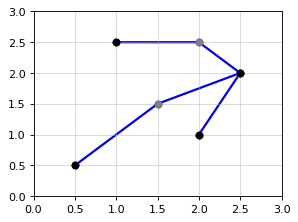

In [110]:
# Creating 'MultiLineString'
multi_line = MultiLineString([((0.5, 0.5), (1.5, 1.5), (2.5, 2)), 
                              ((1, 2.5), (2, 2.5), (2.5, 2), (2, 1))])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(multi_line, ax= ax, color= "blue")
plot_points(multi_line, ax= ax, color= "gray")
plot_points(multi_line.boundary, ax= ax, color= "black")
# Properties
print("Type: {}".format(multi_line.geom_type))
print("Area: {}".format(multi_line.area))
print("Length: {}".format(multi_line.length))
print("Bounds: {}".format(multi_line.bounds))
print("Coordinates: {}".format([list(each.coords) for each in list(multi_line.geoms)]))

Type: MultiPolygon
Area: 2.0
Length: 8.0
Bounds: (1.0, 1.0, 3.0, 3.0)
Geometries: [[(1.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, 1.0), (1.0, 1.0)], [(2.0, 2.0), (2.0, 3.0), (3.0, 3.0), (3.0, 2.0), (2.0, 2.0)]]


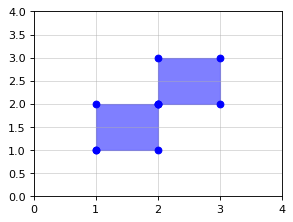

In [112]:
# Creating 'MultiPolygon'
polygon1 = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]
polygon2 = [(2, 2), (2, 3), (3, 3), (3, 2), (2, 2)]
multi_polygon = MultiPolygon([[polygon1], [polygon2]]) # Alternative: multi_polygon = MultiPolygon([[polygon1, []], [polygon2, []]])
# Plot Canvas
fig, ax = new_plot(0, 4, 0, 4)
# Shapely Plot
plot_polygon(multi_polygon, ax= ax, add_points= True, color= "blue", alpha= 0.5)
# Properties
print("Type: {}".format(multi_polygon.geom_type))
print("Area: {}".format(multi_polygon.area))
print("Length: {}".format(multi_polygon.length))
print("Bounds: {}".format(multi_polygon.bounds))
print("Geometries: {}".format([list(each.exterior.coords) for each in list(multi_polygon.geoms)]))

**Unary Predicates**

Has 'z': False
Is Empty?: False
Is Ring?: False
Is Simple?: True
Is Valid?: True


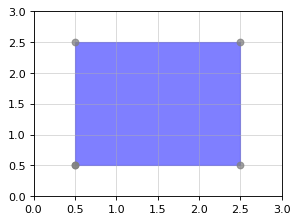

In [114]:
# Creating 'Polygon' (without hole)
polygon = Polygon(shell= [(0.5, 0.5), (0.5, 2.5), (2.5, 2.5), (2.5, 0.5), (0.5, 0.5)])
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_polygon(polygon, ax= ax, add_points= False, color= "blue", alpha= 0.5) # Line
plot_points(polygon, ax= ax, color= "gray", alpha= 0.75) # Points
# Unary Predicates
print("Has 'z': {}".format(polygon.has_z))
print("Is Empty?: {}".format(polygon.is_empty))
print("Is Ring?: {}".format(polygon.is_ring))
print("Is Simple?: {}".format(polygon.is_simple))
print("Is Valid?: {}".format(polygon.is_valid))

**Binary Predicates**

__eq__: False
equals: False
contains: False
covered_by: False
crosses: False
disjoint: False
intersects: True
overlaps: True
touches: False
within: False


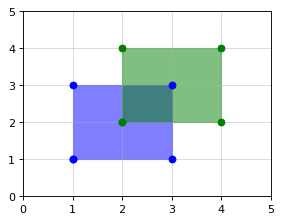

In [115]:
# Creating 'Polygon's
polygon1 = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
polygon2 = Polygon(shell= [(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)])
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_polygon(polygon1, ax= ax, add_points= True, color= "blue", alpha= 0.5)
plot_polygon(polygon2, ax= ax, add_points= True, color= "green", alpha= 0.5)
# Binary Predicates (returns True if comment conditions are met)
print("__eq__: {}".format(polygon1.__eq__(polygon2))) # Same geometric type and coordinates match
print("equals: {}".format(polygon1.equals(polygon2))) # Same 'boundary', 'interior' and 'exterior'
print("contains: {}".format(polygon1.contains(polygon2))) # No points of 'polygon2' lie in the 'polygon1's 'exterior' + ...
                                                          # At least 1 point of 'polygon2's 'interior' lies in 'polygon1's 'interior'
print("covered_by: {}".format(polygon1.covered_by(polygon2))) # Every point of 'polygon2' is a point of 'polygon1's 'interior'/'boundary'
print("crosses: {}".format(polygon1.crosses(polygon2))) # 'polygon1's 'interior' intersects 'polygon2's 'interior' but does not contain it + ...
                                                        # intersection's dimension is less than 'polygon1'/'polygon2' dimension 
print("disjoint: {}".format(polygon1.disjoint(polygon2))) # 'polygon1's 'boundary' and 'interior' do not intersect at all with those of 'polygon2'
print("intersects: {}".format(polygon1.intersects(polygon2))) # 'polygon1's 'boundary'/'interior' intersect in any way with those of 'polygon2'
print("overlaps: {}".format(polygon1.overlaps(polygon2))) # Geometries have 1+ but not all points in common, have same dimension, and intersection of 'interiors' has same dimension as geometries
print("touches: {}".format(polygon1.touches(polygon2))) # Geometries have at least 1 point in common and their 'interiors' do not intersect
print("within: {}".format(polygon1.within(polygon2))) # 'polygon1's 'boundary' and 'interior' intersect only with 'polygon2's 'interior' (not its 'boundary'/'exterior')

**Set-Theoretic Methods**

Type: Point


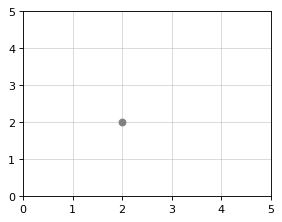

In [117]:
# Creating 'Polygon'
polygon = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
centroid = polygon.centroid
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_points(centroid, ax= ax, color= "gray")
# Properties
print("Type: {}".format(centroid.geom_type))

Type: LineString


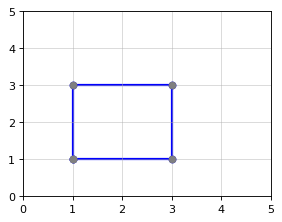

In [116]:
# Creating 'Polygon'
polygon = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
boundary = polygon.boundary
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_line(boundary, ax= ax, color= "blue")
plot_points(boundary, ax= ax, color= "gray")
# Properties
print("Type: {}".format(boundary.geom_type))

Type: Polygon
Area: 3.0
Length: 8.0
Bounds: (1.0, 1.0, 3.0, 3.0)
Exterior Coordinates: [(1.0, 3.0), (2.0, 3.0), (2.0, 2.0), (3.0, 2.0), (3.0, 1.0), (1.0, 1.0), (1.0, 3.0)]
Intersects?: POLYGON ((1 3, 2 3, 2 2, 3 2, 3 1, 1 1, 1 3))


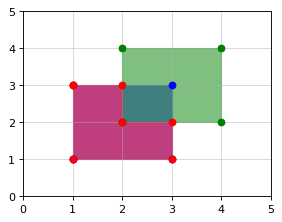

In [118]:
# Creating 'Polygon's
polygon1 = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)]) # Blue
polygon2 = Polygon(shell= [(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)]) # Green
difference = polygon1.difference(polygon2) # Red
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_polygon(polygon1, ax= ax, add_points= True, color= "blue", alpha= 0.5)
plot_polygon(polygon2, ax= ax, add_points= True, color= "green", alpha= 0.5)
plot_polygon(difference, ax= ax, add_points= True, color= "red", alpha= 0.5)
# Properties
print("Type: {}".format(difference.geom_type))
print("Area: {}".format(difference.area))
print("Length: {}".format(difference.length))
print("Bounds: {}".format(difference.bounds))
print("Exterior Coordinates: {}".format(list(difference.exterior.coords)))

Type: Polygon
Area: 1.0
Length: 4.0
Bounds: (2.0, 2.0, 3.0, 3.0)
Exterior Coordinates: [(3.0, 3.0), (3.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, 3.0)]


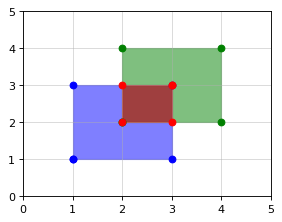

In [119]:
# Creating 'Polygon's
polygon1 = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
polygon2 = Polygon(shell= [(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)])
intersection = polygon1.intersection(polygon2)
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_polygon(polygon1, ax= ax, add_points= True, color= "blue", alpha= 0.5)
plot_polygon(polygon2, ax= ax, add_points= True, color= "green", alpha= 0.5)
plot_polygon(intersection, ax= ax, add_points= True, color= "red", alpha= 0.5)
# Properties
print("Type: {}".format(intersection.geom_type))
print("Area: {}".format(intersection.area))
print("Length: {}".format(intersection.length))
print("Bounds: {}".format(intersection.bounds))
print("Exterior Coordinates: {}".format(list(intersection.exterior.coords)))

Type: Polygon
Area: 7.0
Length: 12.0
Bounds: (1.0, 1.0, 4.0, 4.0)
Exterior Coordinates: [(1.0, 3.0), (2.0, 3.0), (2.0, 4.0), (4.0, 4.0), (4.0, 2.0), (3.0, 2.0), (3.0, 1.0), (1.0, 1.0), (1.0, 3.0)]


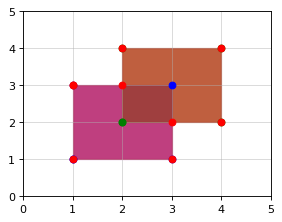

In [120]:
# Creating 'Polygon's
polygon1 = Polygon(shell= [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
polygon2 = Polygon(shell= [(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)])
union = polygon1.union(polygon2)
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 5)
# Shapely Plot
plot_polygon(polygon1, ax= ax, add_points= True, color= "blue", alpha= 0.5)
plot_polygon(polygon2, ax= ax, add_points= True, color= "green", alpha= 0.5)
plot_polygon(union, ax= ax, add_points= True, color= "red", alpha= 0.5)
# Properties
print("Type: {}".format(union.geom_type))
print("Area: {}".format(union.area))
print("Length: {}".format(union.length))
print("Bounds: {}".format(union.bounds))
print("Exterior Coordinates: {}".format(list(union.exterior.coords)))

**Constructive Methods**

Type: Polygon
Area: 0.31568274245273
Length: 6.514033115695476
Bounds: (0.9, 1.0, 2.1, 2.1)


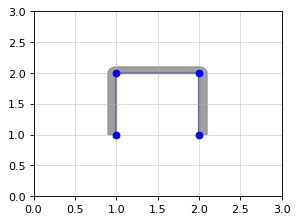

In [128]:
# Creating 'LineStrings'
line = LineString([(1, 1), (1, 2), (2, 2), (2, 1)])
buffer = line.buffer(0.1, single_sided=True) # Positive 'distance' means left-sided (vie versa for right-sided)
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(line, ax= ax, add_points= True, color= "blue", alpha= 0.75) # Line
plot_polygon(buffer, ax= ax, add_points= False, color= "gray", alpha= 0.75) # buffer
# Properties
print("Type: {}".format(buffer.geom_type))
print("Area: {}".format(buffer.area))
print("Length: {}".format(buffer.length))
print("Bounds: {}".format(buffer.bounds))

Type: Polygon
Area: 1.0
Length: 4.0
Bounds: (1.0, 1.0, 2.0, 2.0)


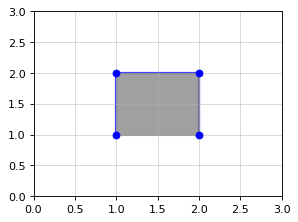

In [129]:
# Creating 'LineStrings'
line = LineString([(1, 1), (1, 2), (2, 2), (2, 1)])
convex_hull = line.convex_hull
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(line, ax= ax, add_points= True, color= "blue", alpha= 0.75) # Line
plot_polygon(convex_hull, ax= ax, add_points= False, color= "gray", alpha= 0.75) # buffer
# Properties
print("Type: {}".format(convex_hull.geom_type))
print("Area: {}".format(convex_hull.area))
print("Length: {}".format(convex_hull.length))
print("Bounds: {}".format(convex_hull.bounds))

Type: Polygon
Area: 1.0
Length: 4.0
Bounds: (1.0, 1.0, 2.0, 2.0)


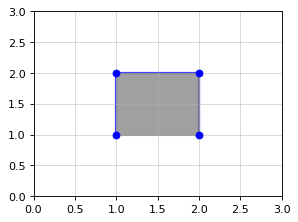

In [130]:
# Creating 'LineStrings'
line = LineString([(1, 1), (1, 2), (2, 2), (2, 1)])
envelope = line.envelope
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_line(line, ax= ax, add_points= True, color= "blue", alpha= 0.75) # Line
plot_polygon(envelope, ax= ax, add_points= False, color= "gray", alpha= 0.75) # buffer
# Properties
print("Type: {}".format(envelope.geom_type))
print("Area: {}".format(envelope.area))
print("Length: {}".format(envelope.length))
print("Bounds: {}".format(envelope.bounds))

Type: Polygon
Area: 2.82842712474619
Length: 6.1229349178414365
Bounds: (0.5, 0.5, 2.5, 2.5)


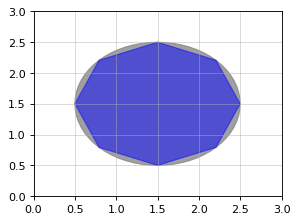

In [139]:
# Creating 'LineStrings'
circle = Point(1.5, 1.5).buffer(1)
simplify = circle.simplify(0.1, preserve_topology=False)
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_polygon(circle, ax= ax, add_points= False, color= "gray", alpha= 0.75) # Original
plot_polygon(simplify, ax= ax, add_points= False, color= "blue", alpha= 0.5) # simplify
# Properties
print("Type: {}".format(simplify.geom_type))
print("Area: {}".format(simplify.area))
print("Length: {}".format(simplify.length))
print("Bounds: {}".format(simplify.bounds))

**Affine Transformations**

(<matplotlib.patches.PathPatch at 0x11e9cc400>,
 <matplotlib.lines.Line2D at 0x11e9cca60>)

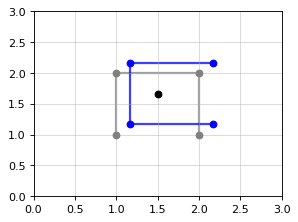

In [143]:
# Creating 'LineStrings'
line = LineString([(1, 1), (1, 2), (2, 2), (2, 1)])
rotate = affinity.rotate(line, 90, origin="centroid")
# Plot Canvas
fig, ax = new_plot(0, 3, 0, 3)
# Shapely Plot
plot_points(line.centroid, ax= ax, color= "black") # Centroid
plot_line(line, ax= ax, add_points= True, color= "gray", alpha= 0.75) # Original
plot_line(rotate, ax= ax, add_points= True, color= "blue", alpha= 0.75) # Rotate

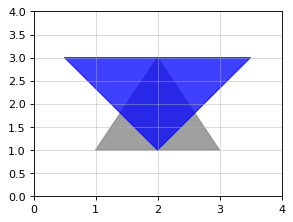

In [146]:
# Creating 'LineStrings'
polygon = Polygon([(1, 1), (2, 3), (3, 1)])
scale = affinity.scale(polygon, xfact=1.5, yfact=-1) # 'xfact': scales horizontally / 'yfact': scales vertically
# Plot Canvas
fig, ax = new_plot(0, 4, 0, 4)
# Shapely Plot
plot_polygon(polygon, ax= ax, add_points= False, color= "gray", alpha= 0.75) # Original
plot_polygon(scale, ax= ax, add_points= False, color= "blue", alpha= 0.75) # Original

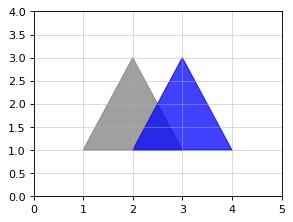

In [148]:
# Creating 'LineStrings'
polygon = Polygon([(1, 1), (2, 3), (3, 1)])
translate = affinity.translate(polygon, xoff=1, yoff=0)
# Plot Canvas
fig, ax = new_plot(0, 5, 0, 4)
# Shapely Plot
plot_polygon(polygon, ax= ax, add_points= False, color= "gray", alpha= 0.75) # Original
plot_polygon(translate, ax= ax, add_points= False, color= "blue", alpha= 0.75) # Original

---